

---

# 1- Get the Data

---




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.metrics import f1_score

**Read train.csv as a dataframe called train.**

**Read test.csv as a dataframe called test.**

In [2]:
train=pd.read_csv('/content/drive/MyDrive/final project level 1/train (1).csv')
test=pd.read_csv('/content/drive/MyDrive/final project level 1/test (2).csv')

---

#2- Discover and visualize the data

---


## A- Data discovery

taking a look at the top five rows of train DataFrame using the DataFrame’s head() method

In [72]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


taking a look at the top five rows of test DataFrame using the DataFrame’s head() method

In [73]:
test.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


### Get a quick description of the data Using the info() method 

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3505 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3195 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2764 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

now we know that we have seventeen columns in train dataframe and eighteen columns in train dataframe.

in train dataframe two colomns is categorical data and sixteen columns is numerical data.

in test dataframe two columns is categorical data and fifteen is numerical data.
 
There are null values in the following columns:Popularity, key and instrumentalness.

### Looking at the summary of the numerical attributes . Using the describe() method

In [76]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [77]:
test.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3600.000000,3505.000000,3600.000000,3600.000000,3195.000000,3600.000000,3600.000000,3600.000000,3600.000000,2764.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,16196.500000,44.459629,0.544744,0.664197,5.947105,-7.949879,0.622778,0.077813,0.248425,0.175336,0.197720,0.485527,122.335063,2.033447e+05,3.922778
std,1039.374812,17.461328,0.169257,0.233010,3.184676,4.016468,0.484759,0.076914,0.309510,0.303238,0.159040,0.243082,29.705640,1.131593e+05,0.369936
min,14397.000000,1.000000,0.064600,0.000020,1.000000,-34.797000,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,9.871167e-01,1.000000
25%,15296.750000,33.000000,0.430000,0.512000,3.000000,-9.532500,0.000000,0.034800,0.004488,0.000093,0.098575,0.291000,98.515750,1.688360e+05,4.000000
50%,16196.500000,44.000000,0.549000,0.703000,6.000000,-7.043500,1.000000,0.048750,0.080850,0.003755,0.131000,0.481000,120.091000,2.103355e+05,4.000000
75%,17096.250000,56.000000,0.664000,0.859000,9.000000,-5.282250,1.000000,0.082800,0.441250,0.197250,0.265250,0.674000,141.846750,2.533958e+05,4.000000
max,17996.000000,97.000000,0.970000,0.999000,11.000000,1.355000,1.000000,0.886000,0.996000,0.973000,1.000000,0.984000,214.396000,1.412451e+06,5.000000


## B- Data visualization

Creating a hist plot for train dataframe.

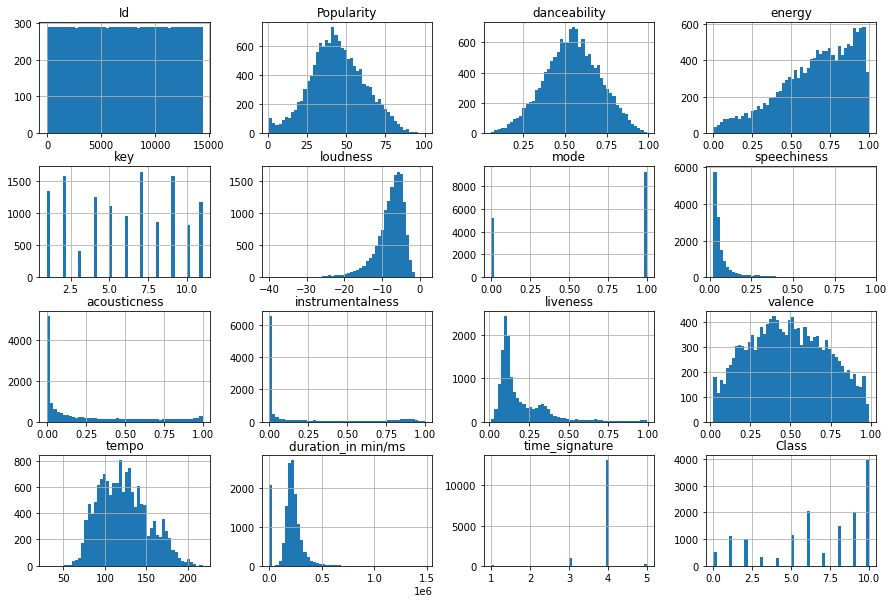

In [78]:
train.hist(bins=50, figsize=(15,10))
plt.show()

Creating a hist plot for test dataframe.

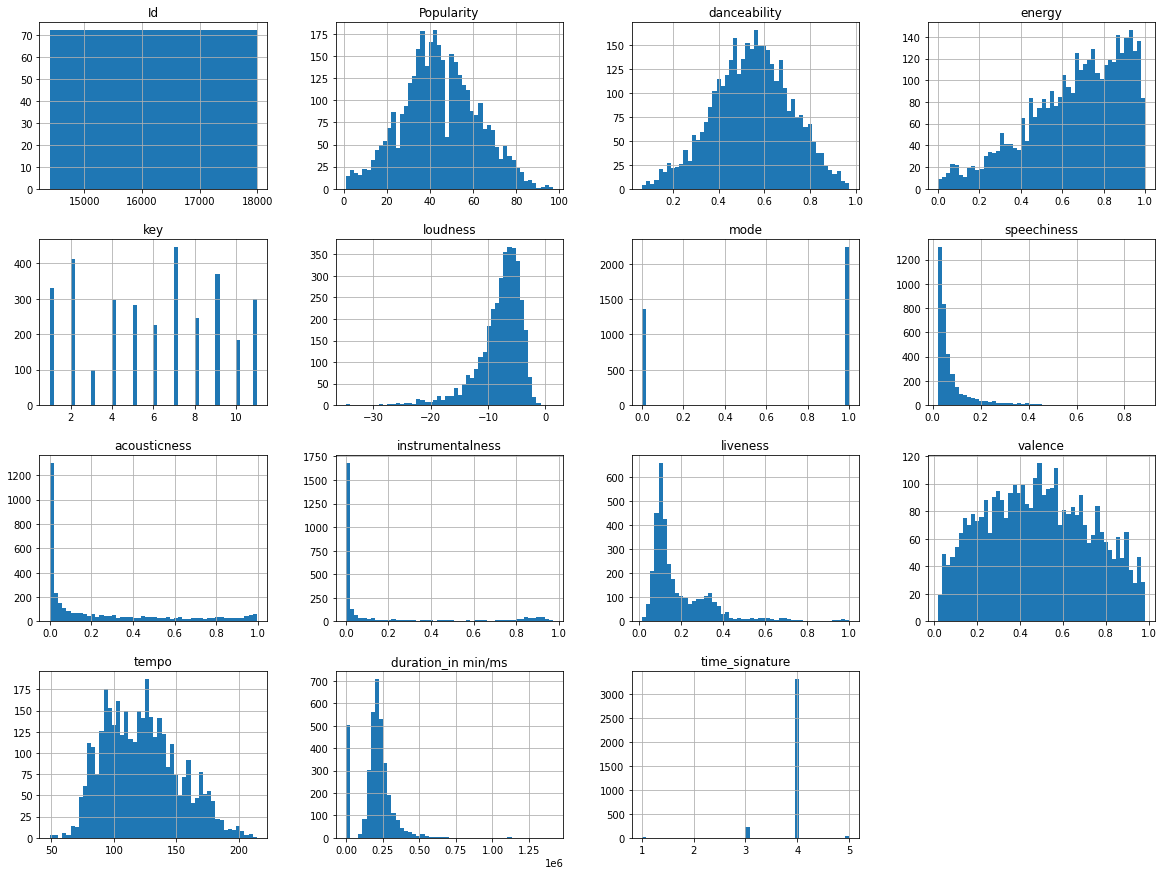

In [79]:
test.hist(bins=50, figsize=(20,15))
plt.show()

Creating a countplot plot for class attribute

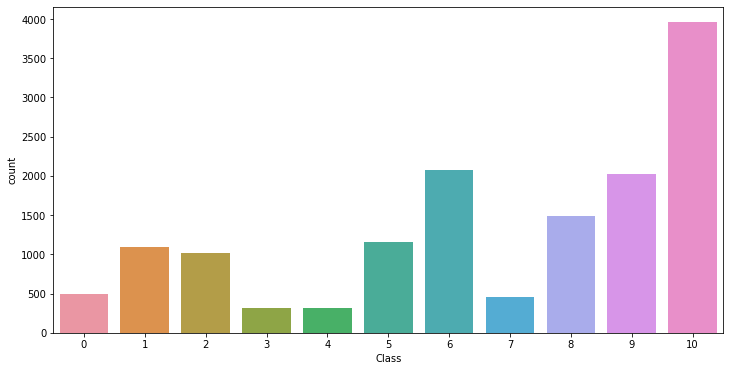

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(data= train, x="Class")

The most frequent class is 10 and the least class is 4

Explore correlation between all continuous numeric variables using .corr() method.

In [81]:
music_corr=train.corr()
music_corr

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,1.000000,0.009026,0.010947,-0.010074,0.005719,-0.007514,-0.010426,-0.005175,-0.006828,0.004770,-0.008143,-0.002044,-0.004239,0.015961,-0.000916,0.002703
Popularity,0.009026,1.000000,0.172907,0.051820,0.010230,0.124621,0.013747,0.029297,-0.128886,-0.165232,-0.068159,0.054741,-0.002964,-0.027773,0.070232,0.159484
danceability,0.010947,0.172907,1.000000,-0.094806,0.007667,0.056193,-0.069311,0.202985,0.007414,-0.203278,-0.105949,0.444798,-0.180764,-0.127245,0.137127,-0.101152
energy,-0.010074,0.051820,-0.094806,1.000000,0.012834,0.769586,-0.035974,0.120869,-0.746436,-0.187964,0.197802,0.227542,0.205421,0.241190,0.142971,0.215611
key,0.005719,0.010230,0.007667,0.012834,1.000000,0.005738,-0.113318,0.001133,-0.007678,-0.001255,0.014747,0.031505,0.019937,0.014343,0.008123,-0.004175
loudness,-0.007514,0.124621,0.056193,0.769586,0.005738,1.000000,-0.030553,0.090473,-0.614967,-0.350667,0.113663,0.185779,0.161750,0.169003,0.125978,0.174111
mode,-0.010426,0.013747,-0.069311,-0.035974,-0.113318,-0.030553,1.000000,-0.072489,0.020817,-0.019665,-0.002697,-0.007580,0.017616,-0.070849,-0.016817,-0.040092
speechiness,-0.005175,0.029297,0.202985,0.120869,0.001133,0.090473,-0.072489,1.000000,-0.084849,-0.065775,0.072569,0.059227,0.049739,0.006253,0.055992,-0.062784
acousticness,-0.006828,-0.128886,0.007414,-0.746436,-0.007678,-0.614967,0.020817,-0.084849,1.000000,0.182656,-0.109400,-0.127707,-0.162988,-0.321357,-0.139500,-0.240609
instrumentalness,0.004770,-0.165232,-0.203278,-0.187964,-0.001255,-0.350667,-0.019665,-0.065775,0.182656,1.000000,-0.049089,-0.228681,-0.036254,-0.010012,-0.067573,-0.028631


Use seaborn method to convert the correlation matrix to a heatmap plot.

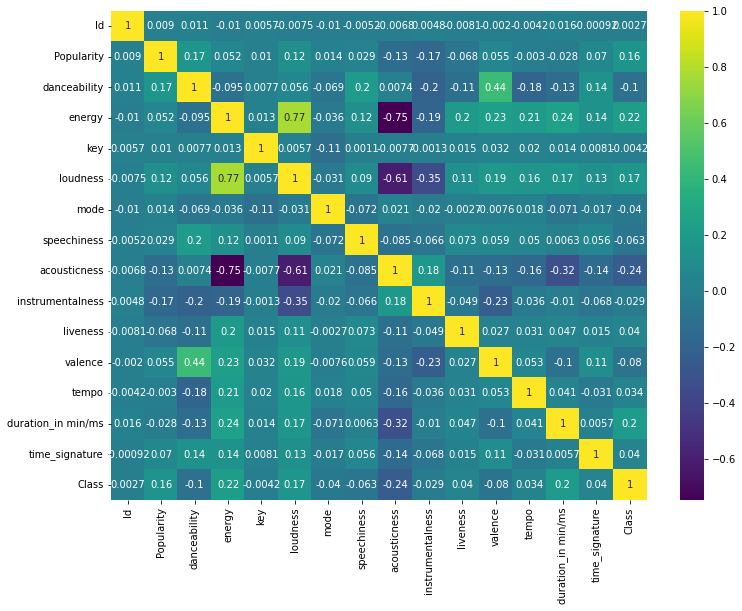

In [82]:
plt.figure(figsize=(12,9))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

Display the correlation between Class variable and all continuous numeric variables

In [83]:
music_corr['Class'].sort_values(ascending=False)

Class                 1.000000
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
liveness              0.040101
time_signature        0.040053
tempo                 0.034496
Id                    0.002703
key                  -0.004175
instrumentalness     -0.028631
mode                 -0.040092
speechiness          -0.062784
valence              -0.080036
danceability         -0.101152
acousticness         -0.240609
Name: Class, dtype: float64




---

# 3- Prepare the data.

---


## A- Attribute Combinations

Delete Id, Artist Name and Track Name attributes because we don't need them and they don't help us in our project.

In [3]:
train_drop=train[['Id','Artist Name','Track Name']]
train=train.drop(train_drop,axis=1)

In [4]:
id=test['Id']
test_drop=test[['Id','Artist Name','Track Name']]
test=test.drop(test_drop,axis=1)





## B- Data Cleaning

In [5]:
columns_name1=[ 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature','Class']
columns_name2=[ 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'livenes', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature']

Display the count of null values in each culomn.

In [6]:
train.isna().sum()

Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Display the count of null values in each culomn using heatmap

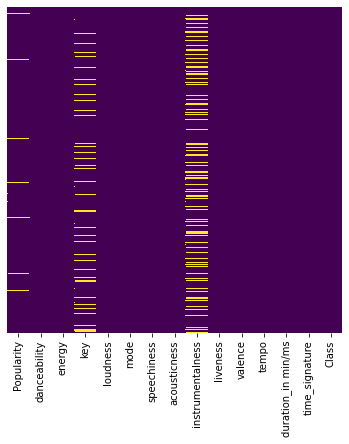

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

replace null values using IterativeImputer from sklearn 

I use RandomForestRegressor to predict these values.

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imptr = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
train1 = pd.DataFrame(imptr.fit_transform(train), columns = columns_name1)
train1

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.00,0.334,0.536,9.00,-6.649,0.0,0.0381,0.378000,0.061909,0.1060,0.235,152.429,204947.000000,4.0,9.0
1,67.00,0.725,0.747,11.00,-5.545,1.0,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4.0,6.0
2,34.64,0.584,0.804,7.00,-6.094,1.0,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4.0,10.0
3,12.00,0.515,0.308,5.27,-14.711,1.0,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3.0,2.0
4,48.00,0.565,0.777,6.00,-5.096,0.0,0.2490,0.183000,0.015263,0.2110,0.619,88.311,254145.000000,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,47.00,0.607,0.946,1.00,-2.965,1.0,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4.0,10.0
14392,27.00,0.435,0.951,8.00,-7.475,1.0,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4.0,8.0
14393,22.00,0.415,0.941,11.00,-4.300,1.0,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4.0,10.0
14394,37.00,0.493,0.986,1.00,-2.279,1.0,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4.0,10.0


In [9]:
test=pd.DataFrame(imptr.fit_transform(test), columns = columns_name2)

Ensure that there are no null vallues using heatmap

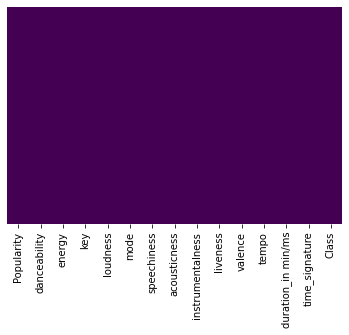

In [10]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

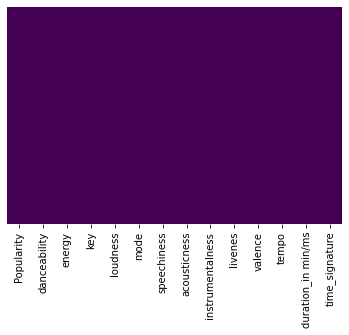

In [11]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## C- Splite the train to train and test for evalution

In [12]:
X_train_ev, X_test_ev, y_train_ev, y_test_ev = train_test_split(train1.drop('Class',axis=1), 
                                                    train1['Class'], test_size=0.40, 
                                                    random_state=101)

In [13]:
X_train=train1.drop('Class',axis=1)
Y_train=train1['Class']


## D- Feature Scaling

Using StandardScaler for feature scaling


In [14]:

Standar_scaler=StandardScaler()
X_train=Standar_scaler.fit_transform(X_train)
test=Standar_scaler.fit_transform(test)
X_train=pd.DataFrame(X_train,columns=columns_name2)
test=pd.DataFrame(test,columns=columns_name2)

In [15]:
Standar_scaler=StandardScaler()
X_train_ev=Standar_scaler.fit_transform(X_train_ev)
X_test_ev=Standar_scaler.fit_transform(X_test_ev)
X_train_ev=pd.DataFrame(X_train_ev,columns=columns_name2)
X_test_ev=pd.DataFrame(X_test_ev,columns=columns_name2)

---

#4- Select and Train a Model

---


Building pipelines of model for various classifiers

In [55]:
pipeline_RF=Pipeline([("rf_clf",RandomForestClassifier(random_state=32))])
pipeline_SVM=Pipeline([("svm_clf",SVC(random_state=32))])
pipeline_KNN=Pipeline([("rf_clf",KNeighborsClassifier())])
pipeline_GredB=Pipeline([("GredB_clf",GradientBoostingClassifier(random_state=32))])
pipeline_XGB=Pipeline([("XGB_clf",xgboost.XGBClassifier( random_state=42))])

# List of all the pipelines
pipelines = [pipeline_RF, pipeline_SVM, pipeline_KNN, pipeline_GredB, pipeline_XGB]

# List of the model names
pipe_dict = ["RandomForest", "Support Vector Machine classifiers","KNeighbors" , "GradientBoostingClassifier", "xgboost.XGBClassifier"]

In [47]:
pipeline_RF=Pipeline([("rf_clf",RandomForestClassifier(max_features= 'sqrt', n_estimators= 1000,random_state=32))])
pipeline_SVM=Pipeline([("svm_clf",SVC(probability=True,C= 10, kernel= 'rbf',gamma="scale",random_state=32))])
pipeline_KNN=Pipeline([("rf_clf",KNeighborsClassifier(n_neighbors=14,weights='uniform',metric='manhattan'))])
pipeline_GredB=Pipeline([("GredB_clf",GradientBoostingClassifier(max_depth=1, n_estimators=100, learning_rate=0.4, random_state=32))])
pipeline_XGB=Pipeline([("XGB_clf",xgboost.XGBClassifier(max_depth=1,
                                                        n_estimators=99, learning_rate=0.55, random_state=42,use_label_encoder=False,eval_metric='logloss'))])

pipelines = [pipeline_RF, pipeline_SVM, pipeline_KNN, pipeline_GredB, pipeline_XGB]

pipe_dict = ["RandomForest", "Support Vector Machine classifiers","KNeighbors" , "GradientBoostingClassifier", "xgboost.XGBClassifier"]

Fit  all  pipelines

In [56]:
for pipe in pipelines:
    pipe.fit(X_train_ev,y_train_ev)

finding f1 score for each model

In [57]:
clf_results_f1 = []
for pipe in pipelines:
    pred=pipe.predict(X_test_ev) 
    clf_results_f1.append(f1_score(y_test_ev,pred,average='weighted'))
for i in range(0,5):
    print(pipe_dict[i],':', clf_results_f1[i])

RandomForest : 0.4787201940384464
Support Vector Machine classifiers : 0.4927539950660533
KNeighbors : 0.42701868610259164
GradientBoostingClassifier : 0.45898800402225226
xgboost.XGBClassifier : 0.4299815915495496


###Tune Hyperparameters

appling grid search on RandomForestClassifier

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
Rand_model=RandomForestClassifier(random_state=32)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Rand_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_ev,y_train_ev)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [17]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.498267 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.446917 (0.016902) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.491341 (0.016762) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.498267 (0.017358) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.446917 (0.016902) with: {'max_features': 'log2', 'n_estimators': 10}
0.491341 (0.016762) with: {'max_features': 'log2', 'n_estimators': 100}
0.498267 (0.017358) with: {'max_features': 'log2', 'n_estimators': 1000}


appling grid search on Support Vector Machine classifiers

In [18]:
svm_clf=SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_ev,y_train_ev)

In [19]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.483179 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.447709 (0.012999) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.449798 (0.015800) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.331609 (0.018026) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.465266 (0.014368) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.478987 (0.015658) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.332045 (0.018515) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.457501 (0.015657) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.483179 (0.013962) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.348277 (0.015335) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.371623 (0.013939) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.430578 (0.011525) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.398321 (0.014466) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.213308 (0.007023) with: {'C': 0.01, 'gamma': 'scale',

appling grid search on KNeighborsClassifier

In [20]:
KNN_Clr=KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNN_Clr, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train_ev,y_train_ev)

In [21]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.461200 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.368747 (0.014717) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.368747 (0.014717) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.386406 (0.014699) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.387908 (0.014347) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.420798 (0.013205) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.414364 (0.012513) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.428069 (0.012976) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.417198 (0.014857) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.438908 (0.014553) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.424913 (0.014179) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.442739 

repeat pipelines after Tune Hyperparameters

In [22]:
pipeline_RF1=Pipeline([("rf_clf",RandomForestClassifier(max_features= 'sqrt', n_estimators= 1000,random_state=32))])
pipeline_SVM1=Pipeline([("svm_clf",SVC(probability=True,C= 1, kernel= 'rbf',gamma="scale",random_state=32))])
pipeline_KNN1=Pipeline([("rf_clf",KNeighborsClassifier(n_neighbors=14,weights='uniform',metric='manhattan'))])
pipeline_GredB1=Pipeline([("GredB_clf",GradientBoostingClassifier())])
pipeline_XGB1=Pipeline([("XGB_clf",xgboost.XGBClassifier())])

pipelines1 = [pipeline_RF1, pipeline_SVM1, pipeline_KNN1, pipeline_GredB1, pipeline_XGB1]

pipe_dict = ["RandomForest", "Support Vector Machine classifiers","KNeighbors" , "GradientBoostingClassifier", "xgboost.XGBClassifier"]

In [23]:
for pipe in pipelines1:
    pipe.fit(X_train_ev,y_train_ev)

In [26]:
clf_results_f1 = []
for pipe in pipelines1:
    pred=pipe.predict(X_test_ev) 
    clf_results_f1.append(f1_score(y_test_ev,pred,average='weighted'))
for i in range(0,5):
    print(pipe_dict[i],':', clf_results_f1[i])

RandomForest : 0.4818451179446411
Support Vector Machine classifiers : 0.4932407753887613
KNeighbors : 0.47056105097555556
GradientBoostingClassifier : 0.4552708272883973
xgboost.XGBClassifier : 0.42984713359812565


### Voting Classifier

hard voting classifier

In [97]:
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=32,max_features='sqrt')
svm_clf = SVC(probability=True,C= 10, kernel= 'rbf',gamma="scale",random_state=32)

voting_clf_hard = VotingClassifier(
    estimators=[ ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

fit the model and predict the class

finding f1 score

In [98]:
voting_clf_hard.fit(X_train_ev,y_train_ev)
vot_pred=voting_clf_hard.predict(X_test_ev)
f1_score(y_test_ev, vot_pred,average='weighted')

0.48900139853864477

soft voting classifier

In [99]:
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=32,max_features='sqrt')
svm_clf = SVC(probability=True,C= 10, kernel= 'rbf',gamma="scale",random_state=32)

voting_clf_soft = VotingClassifier(
    estimators=[ ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

fit the model and predict the class

finding f1 score

In [100]:
voting_clf_soft.fit(X_train_ev,y_train_ev)
vot_pred=voting_clf_soft.predict(X_test_ev)
f1_score(y_test_ev, vot_pred,average='weighted')

0.49561746672880047

soft voting is better than hard voting

### Stacking Classifier

In [101]:
from sklearn.ensemble import StackingClassifier
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=32,max_features='sqrt')
svm_clf = SVC(probability=True,C= 10, kernel= 'rbf',gamma="scale",random_state=32)

estimators=[('svc', svm_clf), ('rf', rnd_clf)]
clf = StackingClassifier(
  estimators=estimators)

fit the model and predict the class

finding f1 score

In [102]:
clf.fit(X_train_ev,y_train_ev)
clf_pred=clf.predict(X_test_ev)
f1_score(y_test_ev, clf_pred,average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5122973823732109

Make a predict on test data

In [103]:
clf.fit(X_train, Y_train)
p=clf.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [111]:
p=p.astype(int)

create data frame cconsists of id column and the predicted values (Class) column called my_clssifier

In [112]:
my_clssifier = pd.DataFrame({'Id':id,'Class':p})

Convert the my_clssifier DataFrame to csv file and save it.

In [113]:
my_clssifier.to_csv('sub.csv',index=False)

Take a look at the my_clssifier DataFrame using head() method

In [114]:
my_clssifier.head()

,Id,Class
0,14397,9
1,14398,6
2,14399,9
3,14400,10
4,14401,5
